# Data Preprocessing

 Life Cycle of ML:



*   Problem Statement

*   Data Collection

*   Data Preprocessing

*   Model Selection

*   Model Training
*   Model Evaluation

*   Model Tuning
*   Model Deployment






After data collection, the raw data is rarely in a form that can be directly used by machine learning algorithms. The next stage is data preprocessing, which involves cleaning and transforming the data into a format suitable for analysis. This step ensures that the data is consistent, accurate, and usable.




Key activities in data preprocessing include:


1.Data Cleaning: Handling missing values, correcting errors, and removing duplicates.

2.Data Transformation: Scaling, normalizing, and encoding categorical variables.

3.Feature Engineering: Creating new features that better represent the underlying patterns in the data.

4.Data Splitting: Dividing the dataset into training and test sets.


In [ ]:
# To work with dataframes
import pandas as pd
# To perform numerical operations
import numpy as np


In [ ]:
# Importing data
churn = pd.read_csv('/content/churn.csv',index_col=0)

In [ ]:
churn1=churn.copy()


In [ ]:
# To view the rows and columns
churn1.dtypes


,0
customerID,object
tenure,object
Contract,object
PaperlessBilling,object
PaymentMethod,object
MonthlyCharges,float64
TotalCharges,float64
gender,object
SeniorCitizen,float64
Partner,object


In [ ]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256 entries, 1 to 256
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        256 non-null    object 
 1   tenure            256 non-null    object 
 2   Contract          256 non-null    object 
 3   PaperlessBilling  256 non-null    object 
 4   PaymentMethod     252 non-null    object 
 5   MonthlyCharges    245 non-null    float64
 6   TotalCharges      241 non-null    float64
 7   gender            256 non-null    object 
 8   SeniorCitizen     251 non-null    float64
 9   Partner           256 non-null    object 
 10  Dependents        256 non-null    object 
 11  PhoneService      256 non-null    object 
 12  MultipleLines     256 non-null    object 
 13  InternetService   256 non-null    object 
 14  OnlineSecurity    256 non-null    object 
 15  OnlineBackup      256 non-null    object 
 16  DeviceProtection  256 non-null    object 
 17  Te

In [ ]:
churn.head()


,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
1,8260-NGFNY,One,Month-to-month,No,Mailed check,25.2,25.20,Female,0.0,No,...,No,No phone service,DSL,No,No,No,No,No,No,Yes
2,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.7,4134.85,Female,0.0,Yes,...,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
3,6598/RFFVI,2,One year,No,Credit card (automatic),19.3,28.30,Male,0.0,No,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
4,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.1,521.30,Female,0.0,No,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
5,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.3,324.20,Female,0.0,No,...,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No


## 1.Checking Inconsistencies

In [ ]:
churn['gender'].value_counts()

,count
gender,
Male,130
Female,126


In [ ]:
# Inordered to select only categorical data from the datset

categotical_data = churn.select_dtypes(include=['object'])

In [ ]:
churn = categotical_data.drop(['customerID','tenure'],ax.apply(lambda x: x.value_counts()).T.stack()

Contract          Month-to-month               137.0
                  One year                      55.0
                  Two year                      64.0
PaperlessBilling  No                            99.0
                  Yes                          157.0
PaymentMethod     Bank transfer (automatic)     59.0
                  Credit card (automatic)       56.0
                  Electronic check              85.0
                  Mailed check                  52.0
gender            Female                       126.0
                  Male                         130.0
Partner           No                           128.0
                  Yes                          128.0
Dependents        1@#                            6.0
                  No                           175.0
                  Yes                           75.0
PhoneService      No                            27.0
                  Yes                          229.0
MultipleLines     No                           116.0
                  No phone service              27.0
                  Yes                          113.0
InternetService   DSL                           86.0
                  Fiber optic                  118.0
                  No                            52.0
OnlineSecurity    No                           136.0
                  No internet service           34.0
                  Yes                           86.0
OnlineBackup      No                           104.0
                  No internet service           34.0
                  Yes                          118.0
DeviceProtection  No                           110.0
                  No internet service           52.0
                  Yes                           94.0
TechSupport       No                           134.0
                  No internet service           52.0
                  Yes                           70.0
StreamingTV       No                           102.0
                  No internet service           44.0
                  Yes                          110.0
StreamingMovies   No                           106.0
                  No internet service           62.0
                  Yes                           88.0
Churn             No                           175.0
                  Yes                           81.0
dtype: float64

In [ ]:
churn.info

<bound method DataFrame.info of      customerID tenure        Contract PaperlessBilling  \
1    8260-NGFNY    One  Month-to-month               No   
2    2359-QWQUL     39        One year              Yes   
3    6598/RFFVI      2        One year               No   
4    IXSTS-8780      6  Month-to-month              Yes   
5    2674/MIAHT   Four  Month-to-month              Yes   
6    6077-BDPXA      3  Month-to-month              Yes   
7    7929/SKFGK     70        Two year               No   
8    7547-EKNFS     42  Month-to-month              Yes   
9    5854-KSRBJ     70        Two year               No   
10   5054-IEXZT    One  Month-to-month              Yes   
11   1877-HKBQX     11        One year              Yes   
12   7235-NXZCP      2  Month-to-month              Yes   
13   3325-FUYCG     28        One year               No   
14   2452-MRMZF     72        Two year              Yes   
15   9184-GALIL     38  Month-to-month               No   
16   9374-YOLBJ    One  Month-to-month               No   
17   2612-PHGOX     64        Two year              Yes   
18   6874-SGLHU     30        One year              Yes   
19   9588-YRFHY     49        Two year              Yes   
20   6513-EECDB    One  Month-to-month              Yes   
21   1306-RPWXZ     49        Two year               No   
22   3797-VTIDR    One  Month-to-month              Yes   
23   2657-VPXTA     10  Month-to-month              Yes   
24   8464-EETCQ     57        Two year               No   
25   0307-BCOPK     16        One year               No   
26   9762-YAQAA     39        One year               No   
27   1114-CENIM     54  Month-to-month              Yes   
28   1090-PYKCI     69        One year              Yes   
29   6362-QHAFM     42        One year              Yes   
30   7978-DKUQH     25  Month-to-month              Yes   
31   6463-HHXJR     71        Two year               No   
32   2592-YKDIF    One  Month-to-month               No   
33   3307-TLCUD     17  Month-to-month               No   
34   6651-AZVTJ     49  Month-to-month              Yes   
35   7181-OQCUT     21  Month-to-month               No   
36   2307-FYNNL     65        Two year              Yes   
37   3671-SHRSP   Four  Month-to-month              Yes   
38   3399-BMLVW     51        Two year               No   
39   7572-KPVKK     62        Two year              Yes   
40   8898-KASCD     39        One year               No   
41   8853-TZDGH     72        Two year              Yes   
42   4910-AQFFX      9  Month-to-month              Yes   
43   7359-SSBJK     64        Two year              Yes   
44   4106-HADHQ     39        One year               No   
45   4822-NGOCH     13  Month-to-month              Yes   
46   7572-KPVKK     62        Two year              Yes   
47   7978-DKUQH     25  Month-to-month              Yes   
48   0195-IESCP     10  Month-to-month              Yes   
49   3889-VWBID     68        Two year               No   
50   0587-DMGBH      8  Month-to-month              Yes   
51   9391-DXGGG     44        One year               No   
52   8932-CZHRQ     68        One year               No   
53   8714-EUHJO    971  Month-to-month              Yes   
54   6652-YFFJO     11  Month-to-month              Yes   
55   7488-MXJIV   Four  Month-to-month              Yes   
56   9823-EALYC     72        Two year              Yes   
57   1591-MQJTP     51        One year              Yes   
58   4480-QQRHC      8  Month-to-month              Yes   
59   4737-HOBAX     63        Two year               No   
60   3585-YNADK     57        One year               No   
61   3733-UOCWF     61        One year              Yes   
62   1363-TXLSL    One  Month-to-month              Yes   
63   0195-IESCP     10  Month-to-month              Yes   
64   8550-XSXUQ     48        One year              Yes   
65   0495-ZBNGW      5  Month-to-month              Yes   
66   1422-DGUBX     32        One year              Yes   
67   0402-CQAJN

In [ ]:
pd.set_option('display.max_rows', None)
churn['tenure'].value_counts()

In [ ]:
pd.set_option('display.max_rows', None)
churn['tenure'].value_counts()
churn['tenure'] = churn.tenure.replace("Four", 4)
churn['tenure'] = churn.tenure.replace("One", 1)
churn['tenure'] = churn.tenure.astype(int)
print(churn['tenure'])

In [ ]:
# Convert the column to numeric values, non-numeric values will be coerced to NaN
churn['tenure'] = pd.to_numeric(churn['tenure'], errors='coerce')

In [ ]:
churn['Dependents'].value_counts()
# Replacing "1@#" with 'No'
churn['Dependents'] = churn['Dependents'].replace("1@#", 'No')

## 2.Handling Missing values

In [ ]:
churn.isnull().sum()

In [ ]:
# 1. Mean Imputation for Numerical Columns
numerical_columns = churn.select_dtypes(include='number').columns
for col in numerical_columns:
    churn[col] = churn[col].fillna(churn[col].mean())

In [ ]:
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen'], dtype='object')

In [ ]:
# 2. Mode Imputation for Categorical Columns
categorical_columns = churn.select_dtypes(include='object').columns
for col in categorical_columns:
    churn[col] = churn[col].fillna(churn[col].mode()[0])

## 3.Handling duplicates

In [ ]:
# Checking the number of duplicate values
churn.duplicated().sum()

np.int64(7)

In [ ]:
churn

In [ ]:
# Accessing dupicate values

duplicated= churn[churn.duplicated(keep=False)]

In [ ]:
sorted_duplicates = duplicated.sort_values(by=['customerID'])
sorted_duplicates

In [ ]:
# Dropping duplicate rows
churn=churn.drop_duplicates()

## 4.Handling outliers

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns


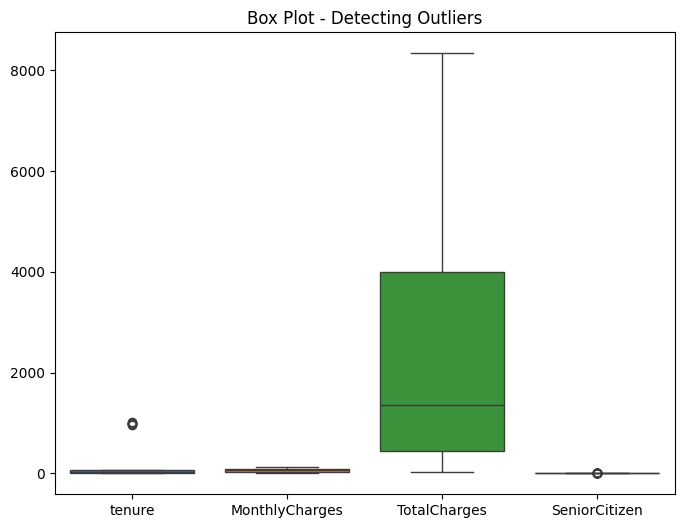

In [ ]:
# 1. Using Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=churn)
plt.title('Box Plot - Detecting Outliers')
plt.show()

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# 2. Manual Method to Detect Outliers (IQR method)
Q1 = churn['TotalCharges'].quantile(0.25)  # First Quartile (25th percentile)
Q3 = churn['TotalCharges'].quantile(0.75)  # Third Quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Outlier thresholds
lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

# Identify outliers using the manual method
outliers = churn[(churn['TotalCharges'] < lower_bound) | (churn['TotalCharges'] > upper_bound)]

# Display outliers

outliers

Handling Outliers:

*   Remove the outliers from the dataset
*   Replacing them with a valid value
*   Capping Method






In [ ]:
churn['TotalCharges'] = churn['TotalCharges'].clip(lower=lower_bound, upper=upper_bound)
churn['MonthlyCharges'] = churn['MonthlyCharges'].clip(lower=lower_bound, upper=upper_bound)

## 5.Feature scaling

In [ ]:
# To scaling the data
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 2. MinMaxScaler - Normalizing the data (scaling to a range [0, 1])
numerical_columns = churn.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen'], dtype='object')

In [ ]:
# 2. MinMaxScaler - Normalizing the data (scaling to a range [0, 1])
numerical_columns = churn.select_dtypes(include=['float64', 'int64']).columns

# 2. MinMaxScaler - Normalizing the data (scaling to a range [0, 1])
minmax_scaler = MinMaxScaler()

churn_minmax_scaled = churn.copy()  # Make a copy to retain original DataFrame
churn_minmax_scaled[numerical_columns] = minmax_scaler.fit_transform(churn[numerical_columns])

# Display the scaled DataFrame
churn_minmax_scaled